In [217]:
#パッケージのインポート(FDD)
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import math as m
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error

In [354]:
P = 20 #200 20
L = 51200#10240#102400
N = 1
M = 16#16#128
fc=2*(10**9)
fu=2*(10**9) #% Carrier frequency=2GHz
fd=2.12*(10**9)
#print(fc)
c=3*(10**8); #% Speed of light
lam, lam_u, lam_d = c/fc, c/fu, c/fd #% 0.15 Carrier wavelenght(m) 
d =lam/2;#distance of BS antenna
kai, kai_u, kai_d = 2*np.pi*d/lam, 2*np.pi*d/lam_u, 2*np.pi*d/lam_d

In [367]:
def h_gen():
  h_UL = 1j*np.zeros((L,M,N))
  h_DL = 1j*np.zeros((L,M,N))
  for i in range(L):#102400
    print(i)
    alpha = np.sqrt(1/2) * np.random.rayleigh([1]*P) #np.random.normal(0,1,(P))#np.random.rand(P) #rand 0to1本当はレイリー分布
    tau = (10**(-4)) * np.random.rand(P)
    phi = (2*np.pi) * np.random.rand(P)
    k=1
    theta = np.random.uniform(np.pi/4-np.pi*(5/180)*k/2,np.pi/4+np.pi*(5/180)*k/2, P) #45degree +- dtheta
    ##print(alpha)
    ##print(tau)
    ##print(phi)
    ##print(theta)

    for n in range(N):
      for p in range(P):
        mlist = np.array(range(M))
        mlist1 = -1j*kai_u* mlist *np.sin(theta[p])
        mlist2 = -1j*kai_d* mlist *np.sin(theta[p])
        a_p1 = np.exp(mlist1)
        a_p2 = np.exp(mlist2)       
        h_UL[i,:,n] += alpha[p]*np.exp(-1j*2*np.pi*fu*tau[p]+1j*phi[p])*a_p1 #alpha[p]*np.exp(-1j*2*np.pi*fu*tau[p]+1j*phi[p])*a_p1 #真のチャネルとしている
        #h_DL += alpha[p]*np.exp(-1j*2*np.pi*fd*tau[p]+1j*phi[p])*a_p
        h_DL[i,:,n] += alpha[p]*np.exp(-1j*2*np.pi*fd*tau[p]+1j*phi[p])*a_p2
        
        #hw_p = np.zeros(M,N)
        #for m in range(M):
          #hw_p[m] = np.sqrt(SNR/2)*(np.random.normal(0,1)*np.exp(1j*np.random.uniform(0,2*np.pi)))
        #h_UL_hat += h_UL
        #h_UL_hat += hw_p
  print(h_UL.shape)
  return h_UL,h_DL
h_UL,h_DL = h_gen()
# print(h_UL)
# print(h_UL.shape)

ストリーミング出力は最後の 5000 行に切り捨てられました。
46201
46202
46203
46204
46205
46206
46207
46208
46209
46210
46211
46212
46213
46214
46215
46216
46217
46218
46219
46220
46221
46222
46223
46224
46225
46226
46227
46228
46229
46230
46231
46232
46233
46234
46235
46236
46237
46238
46239
46240
46241
46242
46243
46244
46245
46246
46247
46248
46249
46250
46251
46252
46253
46254
46255
46256
46257
46258
46259
46260
46261
46262
46263
46264
46265
46266
46267
46268
46269
46270
46271
46272
46273
46274
46275
46276
46277
46278
46279
46280
46281
46282
46283
46284
46285
46286
46287
46288
46289
46290
46291
46292
46293
46294
46295
46296
46297
46298
46299
46300
46301
46302
46303
46304
46305
46306
46307
46308
46309
46310
46311
46312
46313
46314
46315
46316
46317
46318
46319
46320
46321
46322
46323
46324
46325
46326
46327
46328
46329
46330
46331
46332
46333
46334
46335
46336
46337
46338
46339
46340
46341
46342
46343
46344
46345
46346
46347
46348
46349
46350
46351
46352
46353
46354
46355
46356
46357
46358
46359
46360
46361
46

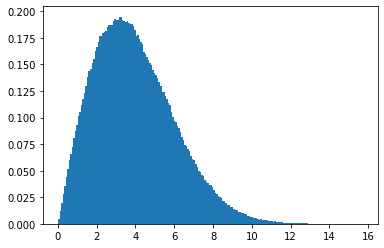

In [335]:
from matplotlib.pyplot import hist
values = hist(abs(h_UL.ravel()), bins=200, density=True)

In [ ]:
def h_gen1():#h_gen_高速化
  h_UL = 1j*np.zeros((L,M,N))
  h_DL = 1j*np.zeros((L,M,N))
  k=1
  mlist = np.array(range(M))
  mlists = np.array([mlist]*P)
  n_alpha = np.sqrt(1/2)*np.random.rayleigh([1]*P*L).reshape(L,P)
  n_tau = (10**(-4)) * np.random.rand(P*L).reshape(L,P)
  n_phi = (2*np.pi) * np.random.rand(P*L).reshape(L,P)
  n_theta = np.random.uniform(np.pi/4-np.pi*(5/180)*k/2,np.pi/4+np.pi*(5/180)*k/2, P*L).reshape(L,P)
  for i in range(L):#102400
    print(i)
    alpha = n_alpha[i]#np.sqrt(1/2) * np.random.rayleigh([1]*P) #np.random.normal(0,1,(P))#np.random.rand(P) #rand 0to1本当はレイリー分布
    tau = n_tau[i]#(10**(-4)) * np.random.rand(P)
    phi = n_phi[i]#(2*np.pi) * np.random.rand(P)
    theta = n_theta[i]#np.random.uniform(np.pi/4-np.pi*(5/180)*k/2,np.pi/4+np.pi*(5/180)*k/2, P) #45degree +- dtheta
    print(mlists.T * np.sin(theta))
    for n in range(N):
      for p in range(P):
        mlist1 = -1j*kai_u* mlist *np.sin(theta[p])
        print(mlist1)
        mlist2 = -1j*kai_d* mlist *np.sin(theta[p])
        a_p1 = np.exp(mlist1)
        a_p2 = np.exp(mlist2)       
        h_UL[i,:,n] += alpha[p]*np.exp(1j*phi[p])*a_p1 #alpha[p]*np.exp(1j*2*np.pi*fu*tau[p]+1j*phi[p])*a_p1 #真のチャネルとしている
        #h_DL += alpha[p]*np.exp(1j*2*np.pi*fd*tau[p]+1j*phi[p])*a_p
        h_DL[i,:,n] += alpha[p]*np.exp(1j*phi[p])*a_p2
  print(h_UL.shape)
  return h_UL,h_DL
h_UL,h_DL = h_gen1()
print(h_UL)
print(h_UL.shape)

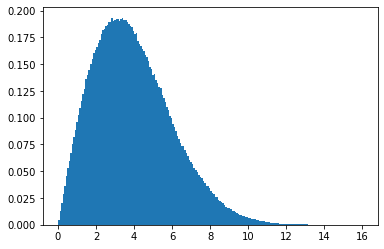

In [337]:
from matplotlib.pyplot import hist
values = hist(abs(h_UL.ravel()), bins=200, density=True)

In [299]:
def h_gen11():#pについてのパラメータは時間変化なし
  h_UL = 1j*np.zeros((L,M,N))
  h_DL = 1j*np.zeros((L,M,N))

  alpha = np.sqrt(1/2) * np.random.rayleigh([1]*P) #np.random.normal(0,1,(P))#np.random.rand(P) #rand 0to1本当はレイリー分布
  tau = (10**(-4)) * np.random.rand(P)
  phi = (2*np.pi) * np.random.rand(P)
  k=1
  theta = np.random.uniform(np.pi/4-np.pi*(5/180)*k/2,np.pi/4+np.pi*(5/180)*k/2, P) #45degree +- dtheta

  for n in range(N):
    for p in range(P):
      mlist = np.array(range(M))
      mlist1 = -1j*kai_u* mlist *np.sin(theta[p])
      mlist2 = -1j*kai_d* mlist *np.sin(theta[p])
      a_p1 = np.exp(mlist1)
      a_p2 = np.exp(mlist2)       
      h_UL[:,:,n] += [alpha[p]*a_p1]*L #alpha[p]*np.exp(1j*2*np.pi*fu*tau[p]+1j*phi[p])*a_p1 #真のチャネルとしている
      #h_DL += alpha[p]*np.exp(1j*2*np.pi*fd*tau[p]+1j*phi[p])*a_p
      h_DL[:,:,n] += [alpha[p]*a_p2]*L
  print(h_UL.shape)
  return h_UL,h_DL
h_UL,h_DL = h_gen11()
print(h_UL)
print(h_UL.shape)

(102400, 16, 1)
[[[ 9.3215343 +0.j        ]
  [-5.4288729 -7.55845862j]
  [-2.95859097+8.77444004j]
  ...
  [-6.89844274+1.23469927j]
  [ 4.7138342 +4.75306638j]
  [ 1.19885367-6.2604079j ]]

 [[ 9.3215343 +0.j        ]
  [-5.4288729 -7.55845862j]
  [-2.95859097+8.77444004j]
  ...
  [-6.89844274+1.23469927j]
  [ 4.7138342 +4.75306638j]
  [ 1.19885367-6.2604079j ]]

 [[ 9.3215343 +0.j        ]
  [-5.4288729 -7.55845862j]
  [-2.95859097+8.77444004j]
  ...
  [-6.89844274+1.23469927j]
  [ 4.7138342 +4.75306638j]
  [ 1.19885367-6.2604079j ]]

 ...

 [[ 9.3215343 +0.j        ]
  [-5.4288729 -7.55845862j]
  [-2.95859097+8.77444004j]
  ...
  [-6.89844274+1.23469927j]
  [ 4.7138342 +4.75306638j]
  [ 1.19885367-6.2604079j ]]

 [[ 9.3215343 +0.j        ]
  [-5.4288729 -7.55845862j]
  [-2.95859097+8.77444004j]
  ...
  [-6.89844274+1.23469927j]
  [ 4.7138342 +4.75306638j]
  [ 1.19885367-6.2604079j ]]

 [[ 9.3215343 +0.j        ]
  [-5.4288729 -7.55845862j]
  [-2.95859097+8.77444004j]
  ...
  [-6.89

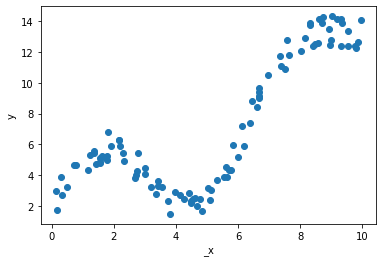

In [ ]:
np.random.seed(2020)

_x = np.random.uniform(0, 10, 100)

x1 = np.sin(_x)
x2 = np.exp(_x / 5)
x = np.stack([x1, x2], axis=1)
y = 3 * x1 + 2 * x2 + np.random.uniform(-1, 1, 100)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(_x, y)
ax.set_xlabel('_x')
ax.set_ylabel('y')
fig.show()

In [368]:
import torch
import torch.nn.functional
import torch.utils.data

class Net(torch.nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(32, 64)
    #self.fc2 = torch.nn.Linear(64, 48)
    self.fc3 = torch.nn.Linear(64, 32)

  def forward(self, x):
    x = torch.nn.functional.relu(self.fc1(x))
    #x = torch.nn.functional.relu(self.fc2(x))
    x = self.fc3(x)
    return x


num_epochs = 1000

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y.reshape(-1, 1)).float()

hn_UL = h_UL + noise_UL
hn_DL = h_DL + noise_DL
print(hn_UL[0])
hn_UL = np.append(hn_UL.real, hn_UL.imag, axis=2)
hn_DL = np.append(hn_DL.real, hn_DL.imag, axis=2)
print(hn_UL[0])
hn_UL = hn_UL.reshape(L,32)#(1,2*N)
hn_DL = hn_DL.reshape(L,32)#(1,2*N)
print(hn_UL[0])

print(hn_UL.shape)
print(hn_DL.shape)

hn_UL_tensor = torch.from_numpy(hn_UL).float()
hn_DL_tensor = torch.from_numpy(hn_DL).float()


print(x_tensor.shape)
print(hn_UL_tensor.shape)
print(y_tensor.shape)
print(hn_DL_tensor.shape)

net = Net()
net.train()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

epoch_loss = []
for epoch in range(num_epochs):
  print(epoch)
  outputs = net(hn_UL_tensor)
  loss = criterion(outputs, hn_DL_tensor)
    
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
    
  epoch_loss.append(loss.data.numpy().tolist())

[[ 6.11734041+2.47007711j]
 [-1.76608573-6.24614606j]
 [-3.7781992 +5.11067669j]
 [ 6.19013563-0.13206176j]
 [-3.76554066-4.67072422j]
 [-1.35124156+5.62051438j]
 [ 5.05594794-2.25468825j]
 [-4.62944389-2.51104395j]
 [ 0.7729274 +4.91379955j]
 [ 3.22202473-3.36715795j]
 [-4.29881833-0.49227757j]
 [ 2.0190597 +3.42495515j]
 [ 1.3889137 -3.33128049j]
 [-3.13471846+0.77744014j]
 [ 2.1780554 +1.82258666j]
 [ 0.1874282 -2.4365249j ]]
[[ 6.11734041  2.47007711]
 [-1.76608573 -6.24614606]
 [-3.7781992   5.11067669]
 [ 6.19013563 -0.13206176]
 [-3.76554066 -4.67072422]
 [-1.35124156  5.62051438]
 [ 5.05594794 -2.25468825]
 [-4.62944389 -2.51104395]
 [ 0.7729274   4.91379955]
 [ 3.22202473 -3.36715795]
 [-4.29881833 -0.49227757]
 [ 2.0190597   3.42495515]
 [ 1.3889137  -3.33128049]
 [-3.13471846  0.77744014]
 [ 2.1780554   1.82258666]
 [ 0.1874282  -2.4365249 ]]
[ 6.11734041  2.47007711 -1.76608573 -6.24614606 -3.7781992   5.11067669
  6.19013563 -0.13206176 -3.76554066 -4.67072422 -1.35124156 

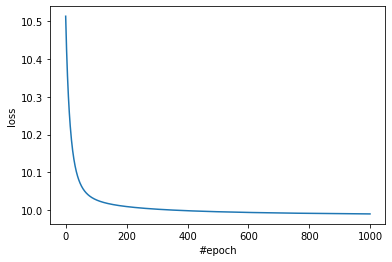

In [369]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(list(range(len(epoch_loss))), epoch_loss)
ax.set_xlabel('#epoch')
ax.set_ylabel('loss')
fig.show()

In [370]:
net.eval()

_x_new = np.linspace(0, 10, 1000)
x1_new = np.sin(_x_new)
x2_new = np.exp(_x_new / 5)
x_new = np.stack([x1_new, x2_new], axis=1)
x_new_tensor = torch.from_numpy(x_new).float()

#h_UL_test, h_DL_test = h_gen()
h_UL_test, h_DL_test = h_UL, h_DL#+noise #h_gen()
hn_UL_test = h_UL_test + noise_UL_test
hn_DL_test = h_DL_test + noise_DL_test
hn_UL_test = np.append(hn_UL_test.real, hn_UL_test.imag, axis=2)
hn_DL_test = np.append(hn_DL_test.real, hn_DL_test.imag, axis=2)
hn_UL_test = hn_UL_test.reshape(L,32)#(1,2*N)
hn_DL_test = hn_DL_test.reshape(L,32)#(1,2*N)
hn_UL_test_tensor = torch.from_numpy(hn_UL_test).float()
hn_DL_test_tensor = torch.from_numpy(hn_DL_test).float()


with torch.no_grad():
    hn_DL_pred_tensor = net(hn_UL_test_tensor)

hn_DL_pred = hn_DL_pred_tensor.data.numpy()
hn_DL_test = hn_DL_test_tensor.data.numpy()

print(hn_DL_pred)
print(hn_DL_test)

[[-0.16087188  0.03118902  0.13864614 ... -0.05455406  0.05493248
   0.05821131]
 [ 0.0382468   0.07644963 -0.04783234 ... -0.10453294  0.00427514
   0.01635682]
 [ 0.08416098  0.18410158  0.1278916  ...  0.09713607 -0.03847206
  -0.21423447]
 ...
 [-0.09991507 -0.09023731  0.09067059 ...  0.050451    0.01445277
  -0.10481201]
 [ 0.00109349 -0.01674763 -0.01192258 ...  0.02244083 -0.009349
   0.03298378]
 [-0.03951094  0.01930904  0.05320661 ...  0.03498168  0.05585374
   0.04621206]]
[[-1.861499   -1.1870803   0.65988207 ...  2.5503871   1.179466
  -2.4046495 ]
 [ 6.0469522   0.54898864 -3.8591137  ... -4.311562   -3.2530172
   2.6217954 ]
 [ 0.53499067  7.3813286   5.121477   ...  5.5188403   1.3840493
  -6.8148584 ]
 ...
 [ 2.9809542  -0.2394835  -2.2765932  ... -2.7281117  -0.8017014
   3.0714731 ]
 [-0.05229101 -0.48343626 -0.19621584 ...  2.919568    0.7236697
  -3.60011   ]
 [ 3.0352132  -8.914793   -8.288018   ... -0.0634084   3.753653
   3.3626883 ]]


In [371]:
print(hn_DL_pred)
print(hn_DL_test)
print(sum(hn_DL_test**2))
#mse = np.mean((y_true - y_pred) ** 2)
nmse = sum(sum((hn_DL_test - hn_DL_pred)**2)) / sum(sum((hn_DL_test**2)))
print(nmse)

[[-0.16087188  0.03118902  0.13864614 ... -0.05455406  0.05493248
   0.05821131]
 [ 0.0382468   0.07644963 -0.04783234 ... -0.10453294  0.00427514
   0.01635682]
 [ 0.08416098  0.18410158  0.1278916  ...  0.09713607 -0.03847206
  -0.21423447]
 ...
 [-0.09991507 -0.09023731  0.09067059 ...  0.050451    0.01445277
  -0.10481201]
 [ 0.00109349 -0.01674763 -0.01192258 ...  0.02244083 -0.009349
   0.03298378]
 [-0.03951094  0.01930904  0.05320661 ...  0.03498168  0.05585374
   0.04621206]]
[[-1.861499   -1.1870803   0.65988207 ...  2.5503871   1.179466
  -2.4046495 ]
 [ 6.0469522   0.54898864 -3.8591137  ... -4.311562   -3.2530172
   2.6217954 ]
 [ 0.53499067  7.3813286   5.121477   ...  5.5188403   1.3840493
  -6.8148584 ]
 ...
 [ 2.9809542  -0.2394835  -2.2765932  ... -2.7281117  -0.8017014
   3.0714731 ]
 [-0.05229101 -0.48343626 -0.19621584 ...  2.919568    0.7236697
  -3.60011   ]
 [ 3.0352132  -8.914793   -8.288018   ... -0.0634084   3.753653
   3.3626883 ]]
[508427.28 513008.2  51117

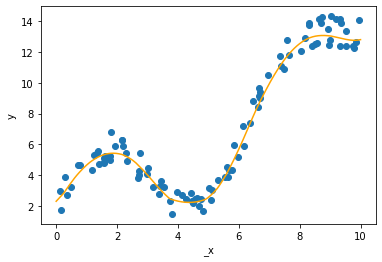

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(_x, y)
ax.plot(_x_new, y_pred, c='orange')
ax.set_xlabel('_x')
ax.set_ylabel('y')
fig.show()

In [ ]:
mlist = np.array(range(M))
print(mlist *np.sin(np.pi/4))

[ 0.          0.70710678  1.41421356  2.12132034  2.82842712  3.53553391
  4.24264069  4.94974747  5.65685425  6.36396103  7.07106781  7.77817459
  8.48528137  9.19238816  9.89949494 10.60660172]


In [364]:
test_results1 = []
predict_list1 = []

hn_UL = h_UL + noise_UL
hn_DL = h_DL + noise_DL
#print(hn_UL[0])
hn_UL = np.append(hn_UL.real, hn_UL.imag, axis=2)
hn_DL = np.append(hn_DL.real, hn_DL.imag, axis=2)
#print(hn_UL[0])
hn_UL = hn_UL.reshape(L,32)#(1,2*N)
hn_DL = hn_DL.reshape(L,32)#(1,2*N)
#print(hn_UL[0])

#print(hn_UL.shape)
#print(hn_DL.shape)

train_x_dataset = pd.DataFrame(hn_UL)
train_y_dataset = pd.DataFrame(hn_DL)

#train_x_dataset.describe().transpose()[['mean', 'std']]
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_x_dataset))
print(normalizer)
print(normalizer.mean.numpy())

#Regression
first = np.array(train_x_dataset[:1])
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

def build_and_compile_model(norm):
  model = Sequential([norm,
      tf.keras.layers.Dense(64, activation='relu'),
      #tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32)])
  model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
  return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

#%%time
history = dnn_model.fit(
train_x_dataset,
train_y_dataset,
validation_split=0.2,
verbose=1, epochs=500)


[[ 0.01665094  0.01495747  0.00073134 -0.02097311 -0.01531576  0.01210627
   0.01768722  0.00339062 -0.00839128 -0.01416942 -0.00436384  0.01427648
   0.01201791 -0.00600519 -0.01143561 -0.00379287  0.0052135   0.00952246
   0.00208634 -0.0097533  -0.00740412  0.00599766  0.00961237 -0.00013807
  -0.00804841 -0.00632715  0.00214853  0.01111906  0.00678643 -0.01080604
  -0.01407427  0.00321623]]
First example: [[-0.22  3.43  2.48 -1.98 -2.92 -0.42  1.61  2.24  0.43 -2.58 -2.04  1.48
   2.46  0.36 -1.51 -1.99 -0.34  2.54  2.14 -1.59 -2.76 -0.48  1.59  2.49
   0.84 -3.   -2.97  1.41  3.15  1.41 -0.99 -3.47]]

Normalized: [[-0.07  1.07  0.78 -0.62 -0.91 -0.14  0.5   0.7   0.14 -0.81 -0.64  0.46
   0.77  0.11 -0.47 -0.62 -0.11  0.8   0.67 -0.5  -0.87 -0.15  0.5   0.79
   0.27 -0.95 -0.94  0.44  0.99  0.45 -0.31 -1.1 ]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (No

KeyboardInterrupt: ignored

In [366]:
h_UL_test, h_DL_test = h_gen() #h_UL, h_DL#+noise
hn_UL_test = h_UL_test + noise_UL_test
hn_DL_test = h_DL_test + noise_DL_test
hn_UL_test = np.append(hn_UL_test.real, hn_UL_test.imag, axis=2)
hn_DL_test = np.append(hn_DL_test.real, hn_DL_test.imag, axis=2)
hn_UL_test = hn_UL_test.reshape(L,32)#(1,2*N)
hn_DL_test = hn_DL_test.reshape(L,32)#(1,2*N)
test_x_dataset = pd.DataFrame(hn_UL)
test_y_dataset = pd.DataFrame(hn_DL)

test_results1.append(dnn_model.evaluate(test_x_dataset, test_y_dataset, verbose=0))
predictions = dnn_model.predict(test_x_dataset)
print(predictions)
print(predictions.shape)
print(test_y_dataset)
mse = mean_squared_error(test_y_dataset.values, predictions)
predict_list1.append(mse)
print(predict_list1)

nmse = sum(sum((test_y_dataset.values - predictions)**2)) / sum(sum((test_y_dataset.values**2)))
print(nmse)

ストリーミング出力は最後の 5000 行に切り捨てられました。
46257
46258
46259
46260
46261
46262
46263
46264
46265
46266
46267
46268
46269
46270
46271
46272
46273
46274
46275
46276
46277
46278
46279
46280
46281
46282
46283
46284
46285
46286
46287
46288
46289
46290
46291
46292
46293
46294
46295
46296
46297
46298
46299
46300
46301
46302
46303
46304
46305
46306
46307
46308
46309
46310
46311
46312
46313
46314
46315
46316
46317
46318
46319
46320
46321
46322
46323
46324
46325
46326
46327
46328
46329
46330
46331
46332
46333
46334
46335
46336
46337
46338
46339
46340
46341
46342
46343
46344
46345
46346
46347
46348
46349
46350
46351
46352
46353
46354
46355
46356
46357
46358
46359
46360
46361
46362
46363
46364
46365
46366
46367
46368
46369
46370
46371
46372
46373
46374
46375
46376
46377
46378
46379
46380
46381
46382
46383
46384
46385
46386
46387
46388
46389
46390
46391
46392
46393
46394
46395
46396
46397
46398
46399
46400
46401
46402
46403
46404
46405
46406
46407
46408
46409
46410
46411
46412
46413
46414
46415
46416
46417
46

In [ ]:
predict_list1 = []
test_results1 = []
SN_dB_List = np.arange(0,32,2)#0,42,2
print(SN_dB_List)
for i in range(1):
    #h_UL,h_DL = h_gen()
    for SN_dB in SN_dB_List:
        print("SNdB:",SN_dB)
        Pn = 10 ** (-SN_dB / 10)
        noise_UL, noise_DL = noise_gen1(Pn)
        hn_UL = h_UL #+ noise_UL
        hn_DL = h_DL #+ noise_DL
        hn_UL = np.array([hn_UL.real,hn_UL.imag])
        hn_DL = np.array([hn_DL.real,hn_DL.imag])
        hn_UL = hn_UL.reshape(L,32)#(1,2*N)
        hn_DL = hn_DL.reshape(L,32)#(1,2*N)
        x_dataset = pd.DataFrame(hn_UL)
        y_dataset = pd.DataFrame(hn_DL)
        train_x_dataset = x_dataset.sample(frac=0.5, random_state=0)
        test_x_dataset = x_dataset.drop(train_x_dataset.index)
        train_y_dataset = y_dataset.sample(frac=0.5, random_state=0)
        test_y_dataset = y_dataset.drop(train_y_dataset.index)

        #train_x_dataset.describe().transpose()[['mean', 'std']]
        normalizer = tf.keras.layers.Normalization(axis=-1)
        normalizer.adapt(np.array(train_x_dataset))
        print(normalizer)
        print(normalizer.mean.numpy())

        #Regression
        first = np.array(train_x_dataset[:1])
        with np.printoptions(precision=2, suppress=True):
          print('First example:', first)
          print()
          print('Normalized:', normalizer(first).numpy())

        def build_and_compile_model(norm):
          model = Sequential([norm,
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dense(64, activation='relu'),
              tf.keras.layers.Dense(32)])
          model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
          return model

        dnn_model = build_and_compile_model(normalizer)
        dnn_model.summary()

        #%%time
        history = dnn_model.fit(
        train_x_dataset,
        train_y_dataset,
        validation_split=0.2,
        verbose=0, epochs=50)

        #test_results = {}
        test_results1.append(dnn_model.evaluate(test_x_dataset, test_y_dataset, verbose=0))
        predictions = dnn_model.predict(test_x_dataset)
        print(predictions)
        print(predictions.shape)
        print(test_y_dataset)
        mse = mean_squared_error(test_y_dataset.values, predictions)
        predict_list1.append(mse)
        print(predict_list1)

In [356]:
def noise_gen1(Pn):### noise_gen1 == noise_gen
  noise_UL = 1j*np.zeros(51200*M*N)
  noise_DL = 1j*np.zeros(51200*M*N)
  for p in range(P):
    noise_UL += np.sqrt(Pn/2)*(np.random.randn(51200*M*N) + 1j*np.random.randn(51200*M*N))
    noise_DL += np.sqrt(Pn/2)*(np.random.randn(51200*M*N) + 1j*np.random.randn(51200*M*N))
  noise_UL = noise_UL.reshape((51200,M,N))
  noise_DL = noise_DL.reshape((51200,M,N))
  return noise_UL,noise_DL
noise_UL, noise_DL = noise_gen1(10**(-25))
noise_UL_test, noise_DL_test = noise_gen1(10**(-25))